<a href="https://colab.research.google.com/github/DavisRayM/msft-stock-prediction/blob/main/msft-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Author: Davis Muro

For CPSC 5610

Microsoft Stock Prediction

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(25)
tf.random.set_seed(25)

In [3]:
df = pd.read_csv('data/MSFT.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/7/2016,59.779999,60.520000,59.779999,60.419998,55.902321,31664800
1,11/8/2016,60.549999,60.779999,60.150002,60.470001,55.948589,22935400
2,11/9/2016,60.000000,60.590000,59.200001,60.169998,55.671009,49632500
3,11/10/2016,60.480000,60.490002,57.630001,58.700001,54.310928,57822400
4,11/11/2016,58.230000,59.119999,58.009998,59.020000,54.607002,38767800


## Preprocessing

In [4]:
# Convert `Date` to `DateTime`
df['Date'] = pd.to_datetime(df['Date'])

# Sort dataframe by `Date` (Ascending)
df.sort_values(by='Date', inplace=True, ascending=True)

# Drop Adj Close
df.drop(columns=['Adj Close'], inplace=True)

df.head(5)

,Date,Open,High,Low,Close,Volume
0,2016-11-07,59.779999,60.520000,59.779999,60.419998,31664800
1,2016-11-08,60.549999,60.779999,60.150002,60.470001,22935400
2,2016-11-09,60.000000,60.590000,59.200001,60.169998,49632500
3,2016-11-10,60.480000,60.490002,57.630001,58.700001,57822400
4,2016-11-11,58.230000,59.119999,58.009998,59.020000,38767800


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[['Close', 'High', 'Low', 'Open', 'Volume']] = scaler.fit_transform(df[['Close', 'High', 'Low', 'Open', 'Volume']])

df.head(5)

,Date,Open,High,Low,Close,Volume
0,2016-11-07,0.005530,0.005148,0.009021,0.008264,0.233481
1,2016-11-08,0.008277,0.006078,0.010356,0.008444,0.149396
2,2016-11-09,0.006315,0.005398,0.006928,0.007366,0.406553
3,2016-11-10,0.008028,0.005041,0.001263,0.002084,0.485441
4,2016-11-11,0.000000,0.000143,0.002634,0.003234,0.301900


In [6]:
# Set `Date` as index; It's unique
if (df.duplicated(subset=['Date']).sum() > 0):
    assert False, "Duplicate dates found"

df.set_index('Date', inplace=True)
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-07,0.005530,0.005148,0.009021,0.008264,0.233481
2016-11-08,0.008277,0.006078,0.010356,0.008444,0.149396
2016-11-09,0.006315,0.005398,0.006928,0.007366,0.406553
2016-11-10,0.008028,0.005041,0.001263,0.002084,0.485441
2016-11-11,0.000000,0.000143,0.002634,0.003234,0.301900


In [7]:
df.shape

(1259, 5)

## Windowing

In [8]:
train_size = df.shape[0] * 80 // 100
test_size = df.shape[0] - train_size
train_size, test_size

(1007, 252)

In [9]:
# Use a sliding window of N days (e.g., 20 days) to predict the next dayʼs values.
train_data = tf.data.Dataset.from_tensor_slices(df.values[:train_size])
test_data = tf.data.Dataset.from_tensor_slices(df.values[:test_size])
n_steps = 20
window_length = n_steps + 1
train_data = train_data.window(window_length, shift =1, drop_remainder=True )
test_data = test_data.window(window_length, shift =1, drop_remainder=True )

In [10]:
for window in train_data.take(2):
    t = list(window.as_numpy_iterator())
    print(len(t))
    print(t)

21
[array([0.00553018, 0.00514818, 0.00902071, 0.00826387, 0.23348119]), array([0.00827743, 0.00607771, 0.01035579, 0.00844353, 0.14939629]), array([0.00631511, 0.00539844, 0.00692791, 0.00736562, 0.40655291]), array([0.00802769, 0.00504094, 0.00126291, 0.00208394, 0.48544114]), array([0.00000000e+00, 1.42994526e-04, 2.63404403e-03, 3.23369140e-03,
       3.01899987e-01]), array([0.00281861, 0.        , 0.        , 0.        , 0.32656466]), array([0.00035679, 0.0014658 , 0.00375262, 0.00269474, 0.27431574]), array([0.00253318, 0.00207357, 0.00552068, 0.00549728, 0.19175083]), array([0.00777794, 0.00668549, 0.00970629, 0.00905433, 0.23798818]), array([0.00909804, 0.00736476, 0.01089702, 0.00801236, 0.19515877]), array([0.00809904, 0.00675699, 0.01133001, 0.00984479, 0.11777511]), array([0.00981162, 0.00779377, 0.01273725, 0.01077896, 0.15200956]), array([0.00991865, 0.00722175, 0.01071661, 0.00819202, 0.13893071]), array([0.00738547, 0.00518393, 0.01028362, 0.0086591 , 0.00947826]), arr

In [11]:
for window in test_data.take(2):
    t = list(window.as_numpy_iterator())
    print(len(t))
    print(t)

21
[array([0.00553018, 0.00514818, 0.00902071, 0.00826387, 0.23348119]), array([0.00827743, 0.00607771, 0.01035579, 0.00844353, 0.14939629]), array([0.00631511, 0.00539844, 0.00692791, 0.00736562, 0.40655291]), array([0.00802769, 0.00504094, 0.00126291, 0.00208394, 0.48544114]), array([0.00000000e+00, 1.42994526e-04, 2.63404403e-03, 3.23369140e-03,
       3.01899987e-01]), array([0.00281861, 0.        , 0.        , 0.        , 0.32656466]), array([0.00035679, 0.0014658 , 0.00375262, 0.00269474, 0.27431574]), array([0.00253318, 0.00207357, 0.00552068, 0.00549728, 0.19175083]), array([0.00777794, 0.00668549, 0.00970629, 0.00905433, 0.23798818]), array([0.00909804, 0.00736476, 0.01089702, 0.00801236, 0.19515877]), array([0.00809904, 0.00675699, 0.01133001, 0.00984479, 0.11777511]), array([0.00981162, 0.00779377, 0.01273725, 0.01077896, 0.15200956]), array([0.00991865, 0.00722175, 0.01071661, 0.00819202, 0.13893071]), array([0.00738547, 0.00518393, 0.01028362, 0.0086591 , 0.00947826]), arr

In [12]:
def show_dataset(dataset, n):
    dataset = dataset.prefetch(1)
    for tensor in dataset.take(n):
        print(tensor)
train_data = train_data.flat_map(lambda window: window.batch(window_length))
test_data = test_data.flat_map(lambda window: window.batch(window_length))

show_dataset(train_data, 2)

tf.Tensor(
[[5.53018034e-03 5.14818192e-03 9.02071110e-03 8.26386525e-03
  2.33481190e-01]
 [8.27743299e-03 6.07771248e-03 1.03557872e-02 8.44352535e-03
  1.49396291e-01]
 [6.31511323e-03 5.39844111e-03 6.92791334e-03 7.36561863e-03
  4.06552908e-01]
 [8.02768631e-03 5.04093513e-03 1.26290677e-03 2.08393933e-03
  4.85441139e-01]
 [0.00000000e+00 1.42994526e-04 2.63404403e-03 3.23369140e-03
  3.01899987e-01]
 [2.81860986e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.26564660e-01]
 [3.56793194e-04 1.46580383e-03 3.75261943e-03 2.69473984e-03
  2.74315740e-01]
 [2.53317745e-03 2.07356900e-03 5.52068241e-03 5.49728005e-03
  1.91750830e-01]
 [7.77793607e-03 6.68549195e-03 9.70629236e-03 9.05432586e-03
  2.37988181e-01]
 [9.09804092e-03 7.36475975e-03 1.08970190e-02 8.01235619e-03
  1.95158766e-01]
 [8.09904352e-03 6.75699458e-03 1.13300095e-02 9.84479006e-03
  1.17775113e-01]
 [9.81161660e-03 7.79377193e-03 1.27372513e-02 1.07789594e-02
  1.52009555e-01]
 [9.91864529e-03 7.22175092e-

In [13]:
batch_size = 32
train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)
show_dataset(train_data, 2)

tf.Tensor(
[[[5.53018034e-03 5.14818192e-03 9.02071110e-03 8.26386525e-03
   2.33481190e-01]
  [8.27743299e-03 6.07771248e-03 1.03557872e-02 8.44352535e-03
   1.49396291e-01]
  [6.31511323e-03 5.39844111e-03 6.92791334e-03 7.36561863e-03
   4.06552908e-01]
  ...
  [3.03268863e-03 1.39429763e-03 5.48459235e-03 4.06007828e-03
   1.74250721e-01]
  [5.24475863e-03 5.39844111e-03 8.22689574e-03 7.54527873e-03
   1.55342359e-01]
  [7.84929328e-03 4.93367046e-03 9.09287679e-03 6.57517239e-03
   1.20225590e-01]]

 [[8.27743299e-03 6.07771248e-03 1.03557872e-02 8.44352535e-03
   1.49396291e-01]
  [6.31511323e-03 5.39844111e-03 6.92791334e-03 7.36561863e-03
   4.06552908e-01]
  [8.02768631e-03 5.04093513e-03 1.26290677e-03 2.08393933e-03
   4.85441139e-01]
  ...
  [5.24475863e-03 5.39844111e-03 8.22689574e-03 7.54527873e-03
   1.55342359e-01]
  [7.84929328e-03 4.93367046e-03 9.09287679e-03 6.57517239e-03
   1.20225590e-01]
  [6.35078470e-03 8.22279841e-03 9.09287679e-03 1.16772060e-02
   2.25237

In [14]:
train_data = train_data.map(lambda window: (window[:, :-1, :], window[:, -1, :]))
test_data = test_data.map(lambda window: (window[:, :-1, :], window[:, -1, :]))
show_dataset(train_data, 2)

(<tf.Tensor: shape=(32, 20, 5), dtype=float64, numpy=
array([[[5.53018034e-03, 5.14818192e-03, 9.02071110e-03, 8.26386525e-03,
         2.33481190e-01],
        [8.27743299e-03, 6.07771248e-03, 1.03557872e-02, 8.44352535e-03,
         1.49396291e-01],
        [6.31511323e-03, 5.39844111e-03, 6.92791334e-03, 7.36561863e-03,
         4.06552908e-01],
        ...,
        [6.70758146e-03, 3.82539049e-03, 5.98975217e-03, 3.88043255e-03,
         2.61196438e-01],
        [3.03268863e-03, 1.39429763e-03, 5.48459235e-03, 4.06007828e-03,
         1.74250721e-01],
        [5.24475863e-03, 5.39844111e-03, 8.22689574e-03, 7.54527873e-03,
         1.55342359e-01]],

       [[8.27743299e-03, 6.07771248e-03, 1.03557872e-02, 8.44352535e-03,
         1.49396291e-01],
        [6.31511323e-03, 5.39844111e-03, 6.92791334e-03, 7.36561863e-03,
         4.06552908e-01],
        [8.02768631e-03, 5.04093513e-03, 1.26290677e-03, 2.08393933e-03,
         4.85441139e-01],
        ...,
        [3.03268863e-03, 1.

In [15]:
# Shape your input as (samples, timesteps, features) .
train_data = train_data.prefetch(1)
for X_batch, Y_batch in train_data.take(1):
    print(X_batch.shape, Y_batch.shape)

(32, 20, 5) (32, 5)


In [16]:
test_data = test_data.prefetch(1)
for X_batch, Y_batch in test_data.take(1):
    print(X_batch.shape, Y_batch.shape)

(32, 20, 5) (32, 5)


## Modelling

In [17]:
from tensorflow.keras.layers import BatchNormalization, Layer
from tensorflow.keras import activations

class BatchNormSimpleRNN(Layer):
    def __init__(self, units, return_sequences=False, dropout=0.2, recurrent_dropout=0.2, **kwargs):
        super().__init__(**kwargs)
        self.simple_rnn = SimpleRNN(units, activation=None, return_sequences=return_sequences, **kwargs)
        self.batch_norm = BatchNormalization()
        self.activation = activations.tanh  # or any other activation you want

    def call(self, inputs, training=None):
        x = self.simple_rnn(inputs)
        x = self.batch_norm(x, training=training)
        x = self.activation(x)
        return x

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Input
from typing import Tuple, List

def create_model(kind: str = "simple", input_shape: Tuple[int, int, int] = (n_steps, 5), hidden_units: List = [128, 64]):
  model = tf.keras.models.Sequential()
  model.add(Input(shape=input_shape))

  if kind == "simple":
    model.add(BatchNormSimpleRNN(hidden_units[0], return_sequences=(len(hidden_units) > 1), dropout=0.2, recurrent_dropout=0.2))

    for units in hidden_units[1:-1]:
      model.add(BatchNormSimpleRNN(units, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

    if len(hidden_units) > 1:
      model.add(BatchNormSimpleRNN(hidden_units[-1], return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
  elif kind == "lstm":
    model.add(LSTM(hidden_units[0], return_sequences=(len(hidden_units) > 1), dropout=0.2, recurrent_dropout=0.2))

    for units in hidden_units[1:-1]:
      model.add(LSTM(units, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

    if len(hidden_units) > 1:
      model.add(LSTM(hidden_units[-1], return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
  elif kind == "gru":
    model.add(GRU(hidden_units[0], return_sequences=(len(hidden_units) > 1), dropout=0.2, recurrent_dropout=0.2))

    for units in hidden_units[1:-1]:
      model.add(GRU(units, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

    if len(hidden_units) > 1:
      model.add(GRU(hidden_units[-1], return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
  else:
    assert False, "Unsupported kind: " + kind

  model.add(Dense(input_shape[1]))
  model.compile(loss="mse", optimizer="adam", metrics=["mae"])
  return model

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_mae',
    patience=3,
    restore_best_weights=True
)

epochs = 20

### Simple RNN

Uses SimpleRNN + Batch normalization layers with 1 hidden layer.

In [20]:
simple = create_model(kind="simple", hidden_units=[128, 64])
simple.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_norm_simple_rnn           │ (None, 20, 128)        │        17,664 │
│ (BatchNormSimpleRNN)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_simple_rnn_1         │ (None, 64)             │        12,608 │
│ (BatchNormSimpleRNN)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,597 (119.52 KB)

 Trainable params: 30,213 (118.02 KB)

 Non-trainable params: 384 (1.50 KB)

In [21]:
simple.fit(train_data, epochs=epochs, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/20
     29/Unknown 8s 28ms/step - loss: 0.2703 - mae: 0.3855

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.2600 - mae: 0.3788 - val_loss: 0.0399 - val_mae: 0.1563
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0207 - mae: 0.1116 - val_loss: 0.0267 - val_mae: 0.1210
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0156 - mae: 0.0989 - val_loss: 0.0132 - val_mae: 0.0847
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0189 - mae: 0.1136 - val_loss: 0.0095 - val_mae: 0.0699
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0212 - mae: 0.1225 - val_loss: 0.0517 - val_mae: 0.1862
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0216 - mae: 0.1242 - val_loss: 0.0410 - val_mae: 0.1611
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0225 - mae: 0.1273 - val_loss: 0.0275 - val_mae: 0.1041


In [22]:
result = pd.DataFrame(simple.history.history)
result.head()

,loss,mae,val_loss,val_mae
0,0.161342,0.314664,0.039908,0.156278
1,0.039478,0.153545,0.026652,0.120976
2,0.030155,0.130502,0.013249,0.084727
3,0.028943,0.131728,0.009533,0.069877
4,0.028593,0.132910,0.051665,0.186210


<Axes: title={'center': 'Mean Absolute Error vs Epoch'}>

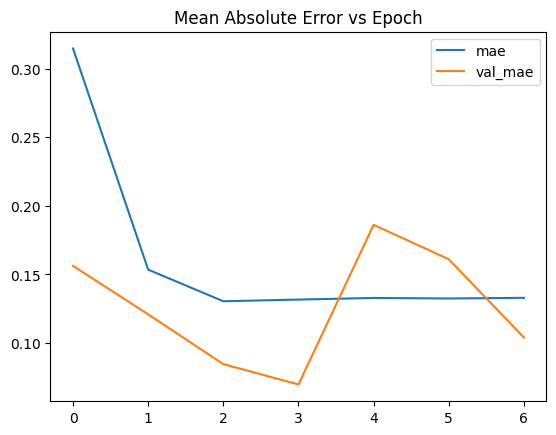

In [23]:
result[['mae', 'val_mae']].plot(title="Mean Absolute Error vs Epoch")

<Axes: title={'center': 'Loss vs Epoch'}>

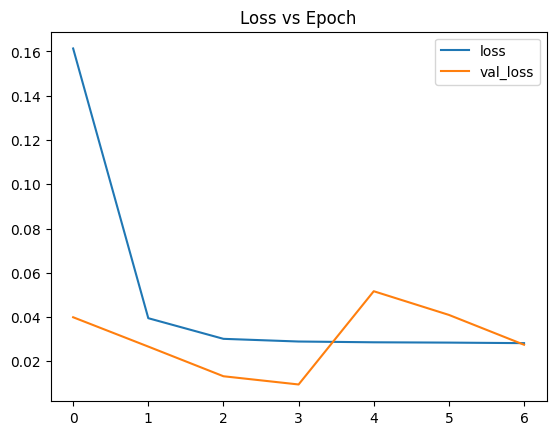

In [24]:
result[['loss','val_loss']].plot(title="Loss vs Epoch")

### GRU Model

Uses a GRU layer with one hidden layer.

In [25]:
gru = create_model(kind="gru", hidden_units=[128, 64])
gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 20, 128)        │        51,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,413 (349.27 KB)

 Trainable params: 89,413 (349.27 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
gru.fit(train_data, epochs=epochs, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/20
     31/Unknown 9s 56ms/step - loss: 0.0040 - mae: 0.0414

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.0041 - mae: 0.0418 - val_loss: 0.0285 - val_mae: 0.1606
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0152 - mae: 0.1029 - val_loss: 0.0185 - val_mae: 0.1296
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - loss: 0.0113 - mae: 0.0889 - val_loss: 0.0136 - val_mae: 0.1097
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0093 - mae: 0.0801 - val_loss: 0.0090 - val_mae: 0.0887
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0067 - mae: 0.0683 - val_loss: 0.0050 - val_mae: 0.0621
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0050 - mae: 0.0568 - val_loss: 0.0027 - val_mae: 0.0417
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0036 - mae: 0.0446 - val_loss: 0.0037 - val_mae: 0.0561
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0044 - mae: 0.0532 - val_loss: 0.0038 - val_mae: 0.0574
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0045 - mae:

In [27]:
result = pd.DataFrame(gru.history.history)
result.head()

,loss,mae,val_loss,val_mae
0,0.161342,0.314664,0.039908,0.156278
1,0.039478,0.153545,0.026652,0.120976
2,0.030155,0.130502,0.013249,0.084727
3,0.028943,0.131728,0.009533,0.069877
4,0.028593,0.132910,0.051665,0.186210


<Axes: title={'center': 'Mean Absolute Error vs Epoch'}>

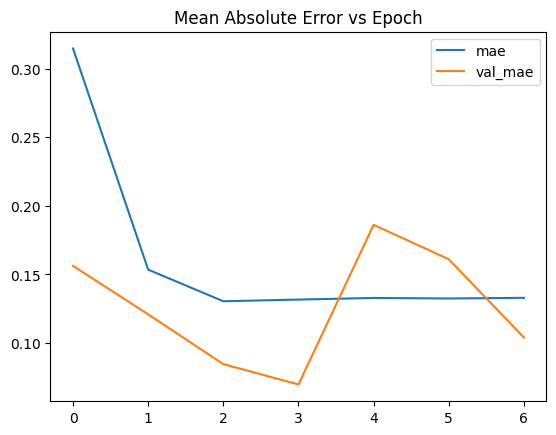

In [28]:
result[['mae', 'val_mae']].plot(title="Mean Absolute Error vs Epoch")

<Axes: title={'center': 'Loss vs Epoch'}>

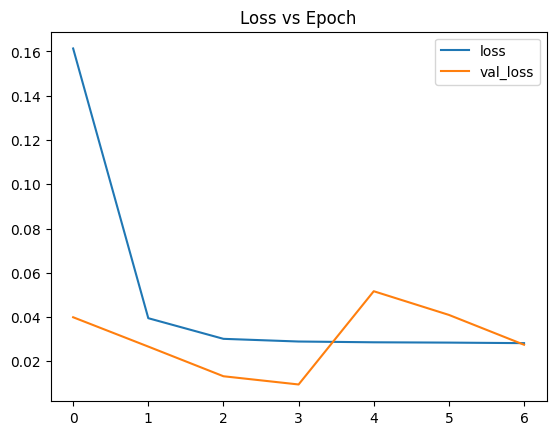

In [29]:
result[['loss','val_loss']].plot(title="Loss vs Epoch")

### LSTM

Uses LSTM layers with 1 hidden layer.

In [ ]:
lstm = create_model(kind="lstm", hidden_units=[128, 64])
lstm.summary()

In [ ]:
result = pd.DataFrame(lstm.history.history)
result.head()

In [ ]:
result[['mae', 'val_mae']].plot(title="Mean Absolute Error vs Epoch")

In [ ]:
result[['loss','val_loss']].plot(title="Loss vs Epoch")